In [109]:
import pandas as pd,numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn import svm
from tabulate import tabulate

In [110]:
data=pd.read_csv("CCPP_data.csv")

In [111]:
df=pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [112]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [113]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<Axes: xlabel='AT', ylabel='PE'>

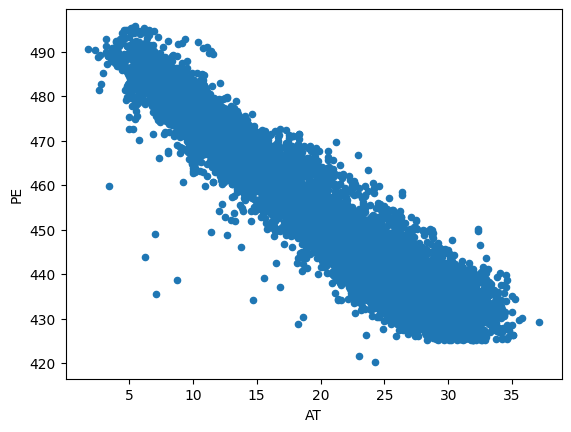

In [114]:
data.plot.scatter(x='AT', y='PE')

<Axes: xlabel='PE', ylabel='AT'>

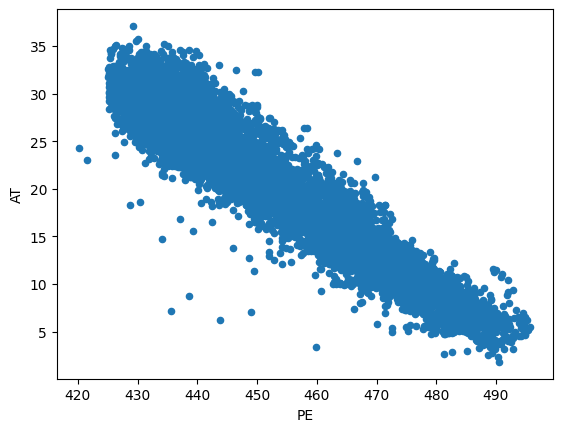

In [115]:
data.plot.scatter(x='PE', y='AT')

<Axes: xlabel='V', ylabel='PE'>

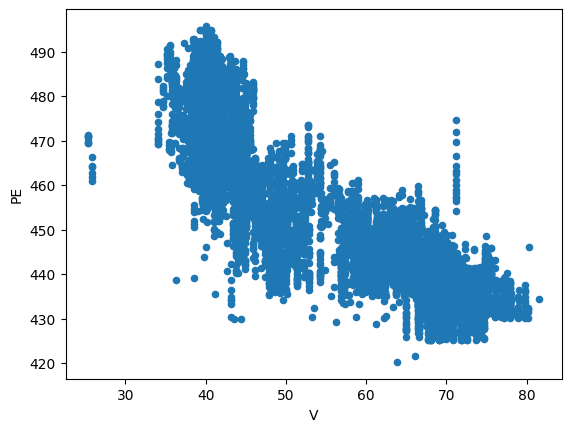

In [116]:
data.plot.scatter(x='V', y='PE')

<Axes: xlabel='AT', ylabel='PE'>

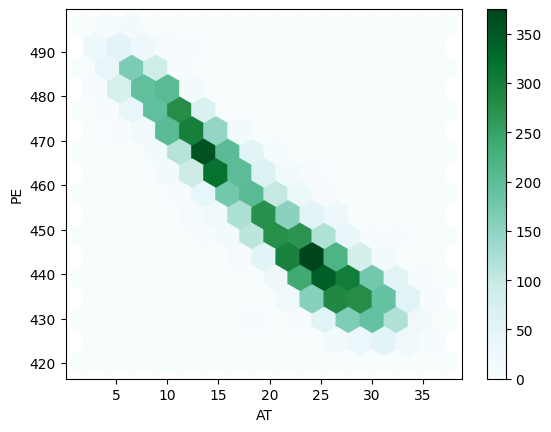

In [117]:
data.plot.hexbin(x='AT', y='PE', gridsize=15)

<Axes: xlabel='V', ylabel='PE'>

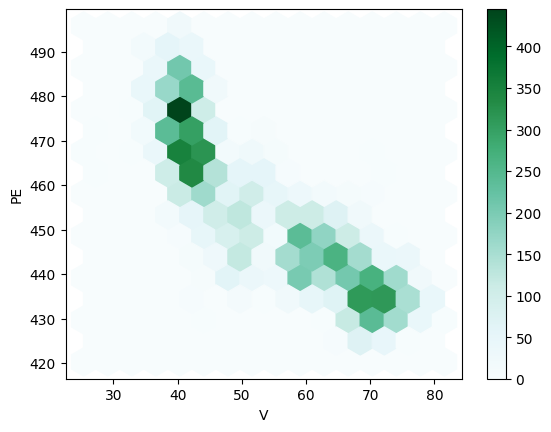

In [118]:
data.plot.hexbin(x='V', y='PE', gridsize=15)

<Axes: >

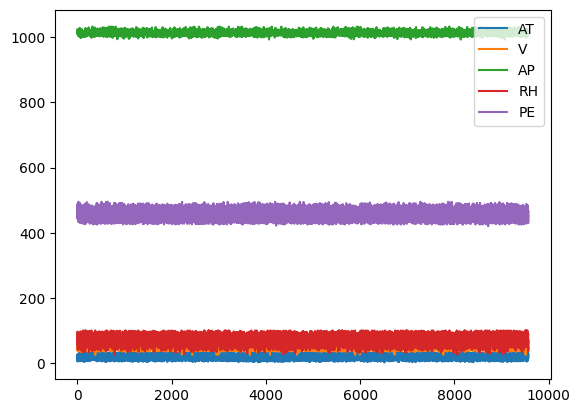

In [119]:
data.plot.line()

In [120]:
df_case1=df[['AT']]

In [121]:
df_case2=df[['AT','V']]

In [122]:
df_case3=df[['AT','V','RH']]

In [123]:
df_case4=df[['AT','V','RH','AP']]

In [124]:
target_case=df['PE']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(df_case1, target_case, test_size = 0.2, random_state = 0)

In [126]:
X_train

,AT
496,11.22
294,13.67
6796,32.84
6785,31.91
1203,10.37
...,...
7891,16.21
9225,13.85
4859,16.81
3264,12.80


In [127]:
X_train.shape,y_train.shape

((7654, 1), (7654,))

In [128]:
X_test.shape,y_test

((1914, 1),
 4834    431.23
 1768    460.01
 2819    461.14
 7779    445.90
 7065    451.29
          ...  
 6452    460.29
 794     452.42
 627     473.26
 3515    438.00
 7600    463.28
 Name: PE, Length: 1914, dtype: float64)

In [129]:
m1_lt_regression = LinearRegression()
m1_lt_regression.fit(X_train, y_train)

LinearRegression()

In [130]:
m1_y_prediction = m1_lt_regression.predict(X_test)
m1_y_prediction

array([434.76410847, 459.05380424, 464.74602275, ..., 470.43824126,
       437.7622999 , 459.48832474])

In [131]:
m1_lt_mean_sq_error=mean_squared_error(y_test,m1_y_prediction)
m1_lt_mean_sq_error

27.799910669569314

In [132]:
m1_lt_root_mean_sq_error = np.sqrt(m1_lt_mean_sq_error)
m1_lt_root_mean_sq_error

5.272562059337881

In [133]:
m1_lt_r_sq = r2_score(y_test, m1_y_prediction)
m1_lt_r_sq

0.9049536175690114

In [134]:
m1_lt_mean_abs_error = mean_absolute_error(y_test, m1_y_prediction)
m1_lt_mean_abs_error

4.174438156494202

In [135]:
m1_dt_regression= DecisionTreeRegressor()
m1_dt_regression.fit(X_train, y_train)

DecisionTreeRegressor()

In [137]:
m1_dt_y_prediction = m1_dt_regression.predict(X_test)
m1_dt_y_prediction

array([435.94      , 458.05      , 467.65333333, ..., 467.65833333,
       439.63      , 457.01      ])

In [138]:
m1_dt_mean_sq_error=mean_squared_error(y_test,m1_dt_y_prediction)
m1_dt_mean_sq_error

35.24224658418387

In [139]:
m1_dt_root_mean_sq_error = np.sqrt(m1_dt_mean_sq_error)
m1_dt_root_mean_sq_error

5.93651805220736

In [140]:
m1_dt_r_sq = r2_score(y_test, m1_dt_y_prediction)
m1_dt_r_sq

0.8795086758953446

In [141]:
m1_dt_mean_abs_error = mean_absolute_error(y_test, m1_dt_y_prediction)
m1_dt_mean_abs_error

4.633473127113801

In [142]:
m1_rf_regression= RandomForestRegressor()
m1_rf_regression.fit(X_train, y_train)

RandomForestRegressor()

In [143]:
m1_rt_y_prediction = m1_rf_regression.predict(X_test)
m1_rt_y_prediction

array([435.07231286, 457.70796666, 467.64736976, ..., 467.70831439,
       439.15414977, 457.55078833])

In [144]:
m1_rt_mean_sq_error=mean_squared_error(y_test,m1_rt_y_prediction)
m1_rt_mean_sq_error

32.31855010238133

In [145]:
m1_rt_root_mean_sq_error = np.sqrt(m1_rt_mean_sq_error)
m1_rt_root_mean_sq_error

5.684940641940013

In [146]:
m1_rt_r_sq = r2_score(y_test, m1_rt_y_prediction)
m1_rt_r_sq

0.8895046351350886

In [147]:
m1_rt_mean_abs_error = mean_absolute_error(y_test, m1_rt_y_prediction)
m1_rt_mean_abs_error

4.447330565951414

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_case2, target_case, test_size = 0.2, random_state = 0)

In [149]:
m2_lt_regression = LinearRegression()
m2_lt_regression.fit(X_train, y_train)

LinearRegression()

In [150]:
m2_lt_y_prediction = m2_lt_regression.predict(X_test)
m2_lt_y_prediction

array([431.3059015 , 459.66930773, 466.17078381, ..., 470.03631172,
       443.50414918, 463.09465765])

In [151]:
m2_lt_mean_sq_error=mean_squared_error(y_test,m2_lt_y_prediction)
m2_lt_mean_sq_error

23.509708220779956

In [152]:
m2_lt_root_mean_sq_error = np.sqrt(m2_lt_mean_sq_error)
m2_lt_root_mean_sq_error

4.848681080539321

In [153]:
m2_lt_r_sq = r2_score(y_test, m2_lt_y_prediction)
m2_lt_r_sq

0.9196215863801613

In [154]:
m2_lt_mean_abs_error = mean_absolute_error(y_test, m2_lt_y_prediction)
m2_lt_mean_abs_error

3.8545533635968434

In [155]:
m2_dt_regression= DecisionTreeRegressor()
m2_dt_regression.fit(X_train, y_train)
m2_dt_y_prediction = m2_dt_regression.predict(X_test)
m2_dt_y_prediction

array([436.97, 454.67, 464.22, ..., 464.25, 450.53, 456.2 ])

In [156]:
m2_dt_mean_sq_error=mean_squared_error(y_test,m2_dt_y_prediction)
m2_dt_root_mean_sq_error = np.sqrt(m2_dt_mean_sq_error)
m2_dt_r_sq = r2_score(y_test, m2_dt_y_prediction)
m2_dt_mean_abs_error = mean_absolute_error(y_test, m2_dt_y_prediction)

In [157]:
m2_dt_mean_sq_error

19.55030988621851

In [158]:
m2_dt_root_mean_sq_error

4.4215732365548925

In [159]:
m2_dt_r_sq

0.9331585539185241

In [160]:
m2_dt_mean_abs_error

3.1736119818878445

In [161]:
m2_rf_regression= RandomForestRegressor()
m2_rf_regression.fit(X_train, y_train)
m2_rf_y_prediction = m2_rf_regression.predict(X_test)
m2_rf_y_prediction

array([433.4106, 456.6745, 467.5971, ..., 466.7551, 443.6372, 459.2867])

In [162]:
m2_rt_mean_sq_error=mean_squared_error(y_test,m2_rf_y_prediction)
m2_rt_root_mean_sq_error = np.sqrt(m2_rt_mean_sq_error)
m2_rt_r_sq = r2_score(y_test, m2_rf_y_prediction)
m2_rt_mean_abs_error = mean_absolute_error(y_test, m2_rf_y_prediction)

In [163]:
m2_rt_mean_sq_error

12.408722182303759

In [164]:
m2_rt_root_mean_sq_error

3.5226016212884135

In [165]:
m2_rt_r_sq

0.9575752538187057

In [166]:
m2_rt_mean_abs_error

2.623771167868179

In [167]:
X_train, X_test, y_train, y_test = train_test_split(df_case3, target_case, test_size = 0.2, random_state = 0)

In [168]:
m3_lt_regression = LinearRegression()
m3_lt_regression.fit(X_train, y_train)
m3_lt_y_prediction = m3_lt_regression.predict(X_test)
m3_lt_y_prediction

array([431.45085245, 458.01218311, 462.31593245, ..., 468.99545339,
       442.78588014, 462.28472432])

In [169]:
m3_lt_mean_sq_error=mean_squared_error(y_test,m3_lt_y_prediction)
m3_lt_root_mean_sq_error = np.sqrt(m3_lt_mean_sq_error)
m3_lt_r_sq = r2_score(y_test, m3_lt_y_prediction)
m3_lt_mean_abs_error = mean_absolute_error(y_test, m3_lt_y_prediction)

In [170]:
m3_lt_mean_sq_error

19.8046748562522

In [171]:
m3_lt_root_mean_sq_error

4.450244359161887

In [172]:
m3_lt_r_sq

0.9322888939219065

In [173]:
m3_lt_mean_abs_error

3.5704029333898633

In [174]:
m3_dt_regression= DecisionTreeRegressor()
m3_dt_regression.fit(X_train, y_train)
m3_dt_y_prediction = m3_dt_regression.predict(X_test)
m3_dt_y_prediction

array([436.42, 454.41, 460.19, ..., 464.25, 437.76, 462.55])

In [175]:
m3_dt_mean_sq_error=mean_squared_error(y_test,m3_dt_y_prediction)

m3_dt_root_mean_sq_error = np.sqrt(m3_dt_mean_sq_error)

m3_dt_r_sq = r2_score(y_test, m3_dt_y_prediction)

m3_dt_mean_abs_error = mean_absolute_error(y_test, m3_dt_y_prediction)


In [176]:
m3_dt_mean_sq_error

21.367136206896557

In [177]:
m3_dt_root_mean_sq_error

4.622459973531037

In [178]:
m3_dt_r_sq

0.926946923552572

In [179]:
m3_dt_mean_abs_error

3.2407575757575753

In [180]:
m3_rf_regression= RandomForestRegressor()
m3_rf_regression.fit(X_train, y_train)
m3_rf_y_prediction = m3_rf_regression.predict(X_test)
m3_rf_y_prediction

array([434.2415, 457.357 , 466.6999, ..., 469.5147, 440.3078, 461.3801])

In [181]:
m3_rt_mean_sq_error=mean_squared_error(y_test,m3_rf_y_prediction)

m3_rt_root_mean_sq_error = np.sqrt(m3_rt_mean_sq_error)

m3_rt_r_sq = r2_score(y_test, m3_rf_y_prediction)

m3_rt_mean_abs_error = mean_absolute_error(y_test, m3_rf_y_prediction)


In [182]:
m3_rt_mean_sq_error

11.587175770527692

In [183]:
m3_rt_root_mean_sq_error

3.40399409084794

In [184]:
m3_rt_r_sq

0.9603840763133746

In [185]:
m3_rt_mean_abs_error

2.519544357366781

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df_case4, target_case, test_size = 0.2, random_state = 0)

In [187]:
m4_lt_regression = LinearRegression()
m4_lt_regression.fit(X_train, y_train)


LinearRegression()

In [188]:
m4_lt_y_prediction = m4_lt_regression.predict(X_test)
m4_lt_y_prediction

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

In [189]:
m4_lt_mean_sq_error=mean_squared_error(y_test,m4_lt_y_prediction)
m4_lt_mean_sq_error

19.733699303497644

In [190]:
m4_lt_root_mean_sq_error = np.sqrt(m4_lt_mean_sq_error)
m4_lt_root_mean_sq_error

4.44226285844249

In [191]:
m4_lt_r_sq = r2_score(y_test, m4_lt_y_prediction)
m4_lt_r_sq

0.9325315554761303

In [192]:
m4_lt_mean_abs_error = mean_absolute_error(y_test, m4_lt_y_prediction)
m4_lt_mean_abs_error

3.566564655203822

In [193]:
m4_dt_regression= DecisionTreeRegressor()
m4_dt_regression.fit(X_train, y_train)

DecisionTreeRegressor()

In [194]:
m4_dt_y_prediction = m4_dt_regression.predict(X_test)
m4_dt_y_prediction

array([429.06, 462.81, 460.06, ..., 470.31, 437.76, 462.55])

In [195]:
m4_dt_mean_sq_error=mean_squared_error(y_test,m4_dt_y_prediction)
m4_dt_mean_sq_error

22.98908103448276

In [196]:
m4_dt_root_mean_sq_error = np.sqrt(m4_dt_mean_sq_error)
m4_dt_root_mean_sq_error

4.794693007324114

In [197]:
m4_dt_r_sq = r2_score(y_test, m4_dt_y_prediction)
m4_dt_r_sq

0.9214015824111176

In [198]:
m4_dt_mean_abs_error = mean_absolute_error(y_test, m4_dt_y_prediction)
m4_dt_mean_abs_error

3.106494252873563

In [199]:
m4_rf_regression= RandomForestRegressor()
m4_rf_regression.fit(X_train, y_train)

RandomForestRegressor()

In [200]:
m4_rf_y_prediction = m4_rf_regression.predict(X_test)
m4_rf_y_prediction

array([433.7506, 457.74  , 464.0967, ..., 469.1742, 439.1308, 461.5391])

In [201]:
m4_rt_mean_sq_error=mean_squared_error(y_test,m4_rf_y_prediction)
m4_rt_mean_sq_error

10.351183421536021

In [202]:
m4_rt_root_mean_sq_error = np.sqrt(m4_rt_mean_sq_error)
m4_rt_root_mean_sq_error

3.2173255075506457

In [203]:
m4_rt_r_sq = r2_score(y_test, m4_rf_y_prediction)
m4_rt_r_sq

0.9646098669240125

In [204]:
m4_rt_mean_abs_error = mean_absolute_error(y_test, m4_rf_y_prediction)
m4_rt_mean_abs_error

2.365144305120163

In [205]:
lt_data_head=[["MSE",m1_lt_mean_sq_error,m2_lt_mean_sq_error,m3_lt_mean_sq_error,m4_lt_mean_sq_error],["RMSE",m1_lt_root_mean_sq_error,m2_lt_root_mean_sq_error,m3_lt_root_mean_sq_error,m4_lt_root_mean_sq_error],["RSQ",m1_lt_r_sq,m2_lt_r_sq,m3_lt_r_sq,m4_lt_r_sq],["MABSE",m1_lt_mean_abs_error,m2_lt_mean_abs_error,m3_lt_mean_abs_error,m4_lt_mean_abs_error]]
# m1_lt_data_val=[m1_lt_mean_sq_error,m1_lt_root_mean_sq_error,m1_lt_r_sq,m1_lt_mean_abs_error]

lt_data_head

[['MSE',
  27.799910669569314,
  23.509708220779956,
  19.8046748562522,
  19.733699303497644],
 ['RMSE',
  5.272562059337881,
  4.848681080539321,
  4.450244359161887,
  4.44226285844249],
 ['RSQ',
  0.9049536175690114,
  0.9196215863801613,
  0.9322888939219065,
  0.9325315554761303],
 ['MABSE',
  4.174438156494202,
  3.8545533635968434,
  3.5704029333898633,
  3.566564655203822]]

In [206]:
col_names = ["LinearRegression","M1", "M2","M3","M4"]
print(tabulate(lt_data_head,headers=col_names))

LinearRegression           M1         M2         M3         M4
------------------  ---------  ---------  ---------  ---------
MSE                 27.7999    23.5097    19.8047    19.7337
RMSE                 5.27256    4.84868    4.45024    4.44226
RSQ                  0.904954   0.919622   0.932289   0.932532
MABSE                4.17444    3.85455    3.5704     3.56656


In [207]:
dt_data_head=[["MSE",m1_dt_mean_sq_error,m2_dt_mean_sq_error,m3_dt_mean_sq_error,m4_dt_mean_sq_error],["RMSE",m1_dt_root_mean_sq_error,m2_dt_root_mean_sq_error,m3_dt_root_mean_sq_error,m4_dt_root_mean_sq_error],["RSQ",m1_dt_r_sq,m2_dt_r_sq,m3_dt_r_sq,m4_dt_r_sq],["MABSE",m1_dt_mean_abs_error,m2_dt_mean_abs_error,m3_dt_mean_abs_error,m4_dt_mean_abs_error]]
# m1_lt_data_val=[m1_lt_mean_sq_error,m1_lt_root_mean_sq_error,m1_lt_r_sq,m1_lt_mean_abs_error]

dt_data_head

[['MSE',
  35.24224658418387,
  19.55030988621851,
  21.367136206896557,
  22.98908103448276],
 ['RMSE',
  5.93651805220736,
  4.4215732365548925,
  4.622459973531037,
  4.794693007324114],
 ['RSQ',
  0.8795086758953446,
  0.9331585539185241,
  0.926946923552572,
  0.9214015824111176],
 ['MABSE',
  4.633473127113801,
  3.1736119818878445,
  3.2407575757575753,
  3.106494252873563]]

In [208]:
col_names = ["DecisionTreeRegression","M1", "M2","M3","M4"]
print(tabulate(dt_data_head,headers=col_names))

DecisionTreeRegression           M1         M2         M3         M4
------------------------  ---------  ---------  ---------  ---------
MSE                       35.2422    19.5503    21.3671    22.9891
RMSE                       5.93652    4.42157    4.62246    4.79469
RSQ                        0.879509   0.933159   0.926947   0.921402
MABSE                      4.63347    3.17361    3.24076    3.10649


In [209]:
rt_data_head=[["MSE",m1_rt_mean_sq_error,m2_rt_mean_sq_error,m3_rt_mean_sq_error,m4_rt_mean_sq_error],["RMSE",m1_rt_root_mean_sq_error,m2_rt_root_mean_sq_error,m3_rt_root_mean_sq_error,m4_rt_root_mean_sq_error],["RSQ",m1_rt_r_sq,m2_rt_r_sq,m3_rt_r_sq,m4_rt_r_sq],["MABSE",m1_rt_mean_abs_error,m2_rt_mean_abs_error,m3_rt_mean_abs_error,m4_rt_mean_abs_error]]
# m1_lt_data_val=[m1_lt_mean_sq_error,m1_lt_root_mean_sq_error,m1_lt_r_sq,m1_lt_mean_abs_error]

rt_data_head

[['MSE',
  32.31855010238133,
  12.408722182303759,
  11.587175770527692,
  10.351183421536021],
 ['RMSE',
  5.684940641940013,
  3.5226016212884135,
  3.40399409084794,
  3.2173255075506457],
 ['RSQ',
  0.8895046351350886,
  0.9575752538187057,
  0.9603840763133746,
  0.9646098669240125],
 ['MABSE',
  4.447330565951414,
  2.623771167868179,
  2.519544357366781,
  2.365144305120163]]

In [210]:
col_names = ["RandomForestRegression","M1", "M2","M3","M4"]
print(tabulate(rt_data_head,headers=col_names))

RandomForestRegression           M1         M2         M3        M4
------------------------  ---------  ---------  ---------  --------
MSE                       32.3186    12.4087    11.5872    10.3512
RMSE                       5.68494    3.5226     3.40399    3.21733
RSQ                        0.889505   0.957575   0.960384   0.96461
MABSE                      4.44733    2.62377    2.51954    2.36514


In [1]:
print("As you see above Random Forest Regression Model for df_case4 shows the best performance with R square at 0.96(highest) and RMSE at 3.217 (lowest)")

As you see above Random Forest Regression Model for df_case4 shows the best performance with R square at 0.96(highest) and RMSE at 3.217 (lowest)
